In [1]:
%matplotlib inline
# Importing standard Qiskit libraries and configuring account
from qiskit import QuantumCircuit, execute, Aer, IBMQ
from qiskit.compiler import transpile, assemble
from qiskit.tools.jupyter import *
from qiskit.visualization import *
# Loading your IBM Q account(s)
provider = IBMQ.load_account()

/opt/conda/lib/python3.7/site-packages/qiskit/providers/ibmq/ibmqfactory.py:192: UserWarning: Timestamps in IBMQ backend properties, jobs, and job results are all now in local time instead of UTC.
  warnings.warn('Timestamps in IBMQ backend properties, jobs, and job results '


In [7]:
# Set our secret string to ‘011’
shh = '011'

# Creating registers
# Set the input qubit register size equal to the length of s
input_qubits = len(str(shh))
# Set the total qubits equal to twice the size of input qubits
total_qubits = 2*input_qubits

# Create the quantum circuit
qc = QuantumCircuit(total_qubits)


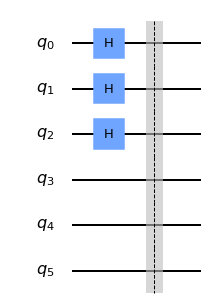

In [8]:
# Apply Hadamard gates before querying the oracle
qc.h(range(input_qubits)) 
qc.barrier()
qc.draw()


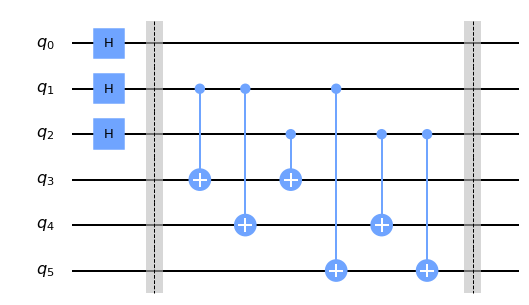

In [9]:
# Create the oracle function of our secret string 
# Since we are only setting the last two qubits, 
# we will only apply cx gates to the last two. 
for idx in range(input_qubits):
    if(shh[idx] == '1'):
        for count in range(input_qubits):
            qc.cx(idx, input_qubits + count)

qc.barrier()
qc.draw()


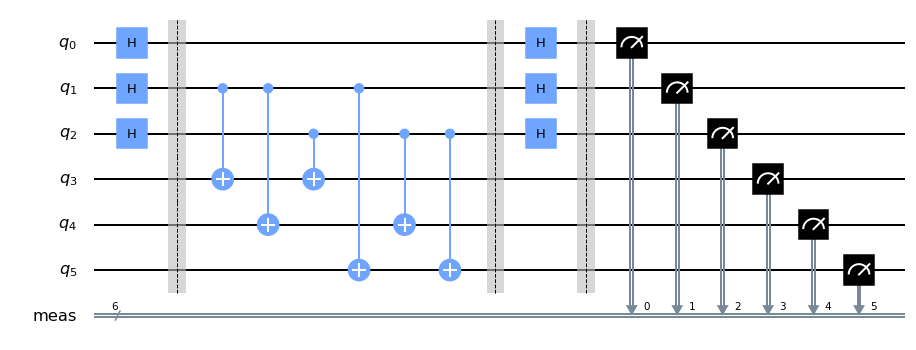

In [10]:
# Apply Hadamard gates to the input register
qc.h(range(len(str(shh))))

# Measure ancilla qubits
qc.measure_all()
qc.draw()

In [11]:
# Execute the quantum circuit on the simulator
backend = Aer.get_backend('qasm_simulator')
shots = 1024
results = execute(qc, backend=backend, shots=shots).result()
counts = results.get_counts(qc)

# Print results
print('Counts: ', counts)


Counts:  {'000000': 257, '111000': 251, '111110': 255, '000110': 261}


sub results {'000': 508, '110': 516}


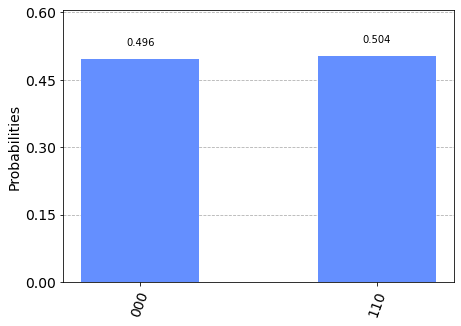

In [12]:
# Create a new object to store the input register counts
sub_results = {}
# Loop through each of the count keys and extract the 
# the input register and their respective counts. 
for count in counts.keys():
    rev_count_key = count[::-1]
    input_count = count[input_qubits:]
    count_value = counts[count]
    if input_count in sub_results:
        sub_results[input_count] += count_value
    else:
        sub_results[input_count] = count_value

# Print and plot the results
print('sub results', sub_results)
plot_histogram(sub_results)


In [14]:
# Initialize the 3-qubit quantum circuit
# Set the state '110'
s = '110'
num_qubits = len(s)
qc = QuantumCircuit(num_qubits)

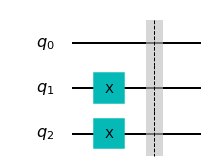

In [15]:
# Set reverse ordering
s = s[::-1] 

# Construct the state 110
for idx in range(num_qubits):
    if s[idx] == '1':
        qc.x(idx)    

qc.barrier()
qc.draw()

In [16]:
# Import the value pi for our rotations
from numpy import pi

# Always start from the most significant qubit, 
# in this case it's q2.
# Step 1, add a Hadamard gate
qc.h(2)


In [17]:
# Step 2, add CROT gates from most significant qubit 
qc.cu1(pi/2, 1, 2)


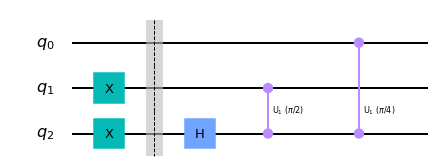

In [18]:
# Step 3, add another CROT from 2 to the next qubit down,
# while doubling the phase denominator
qc.cu1(pi/4, 0, 2)

# Draw the circuit
qc.draw()


In [19]:
# Now that we finished from 2 down to 0
# We'll drop to the next least significant qubit and start again, 
# Step 1, add a Hadamard gate
qc.h(1)


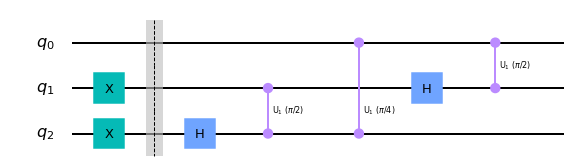

In [20]:
# Step 2, add Control Rotation (CROT) gates from most significant towards 
# least significant starting a pi/2, and doubling the denominator 
# as you go down each qubit. 
qc.cu1(pi/2, 0, 1)

# Draw the circuit
qc.draw()


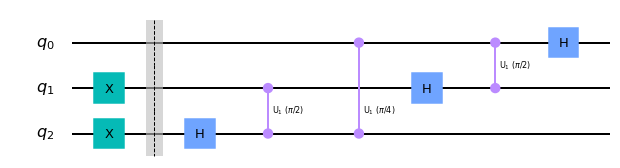

In [21]:
# Step 1, add a Hadamard gate
qc.h(0)
# Since we are at the least significant qubit, we are done!

# Draw the circuit
qc.draw()


In [22]:
# Define a function which will add the swap gates to the outer 
# pair of qubits
def add_swap_gates(qc_swaps, qubits):
    for qubit in range(qubits//2):
        qc_swaps.swap(qubit, qubits-qubit-1)
    return qc_swaps


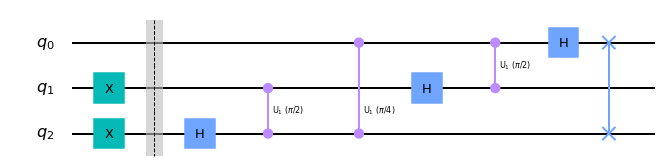

In [23]:
qft_circuit = add_swap_gates(qc, num_qubits)
qft_circuit.draw()


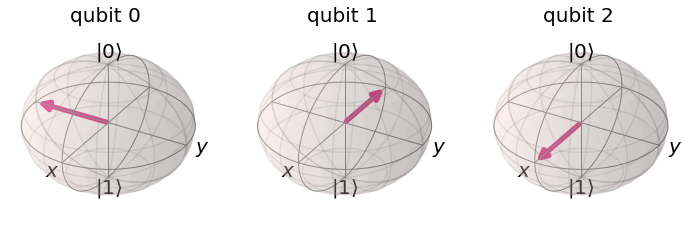

In [24]:
# Get the state vector simulator to view our final QFT state
backend = Aer.get_backend("statevector_simulator")

# Execute the QFT circuit and visualize the results
statevector = execute(qft_circuit,       
                   backend=backend).result().get_statevector()
plot_bloch_multivector(statevector)


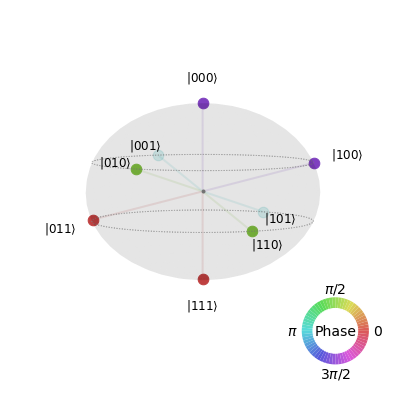

In [25]:
plot_state_qsphere(statevector)

# Aqua: Shor's algorithm
Running Shor's algorithm to factor two numbers. 

In [26]:
# Import Shor’s algorithm library
from qiskit.aqua.algorithms import Shor

# Import the QuantumInstance module that will allow us to run the algorithm on a simulator and a quantum computer
from qiskit.aqua import QuantumInstance


In [27]:
# Declare the product 'N', and our base 'a'
N = 21
a = 3


In [28]:
# Configure backend simulator parameters
backend = Aer.get_backend('qasm_simulator')
shots = 1024

# Initialize the QuantumInstance object which will execute 
# Shor’s algorithm
qi = QuantumInstance(backend=backend, shots=shots) 


In [31]:
shors_algorithm = Shor(N=N, a=a, quantum_instance = qi)

In [32]:
results = shors_algorithm.run()

In [33]:
# Declare the product 'N', and our base 'a'
N = 21
a = 2


In [34]:
results = shors_algorithm.run()

In [35]:
print(results['factors'])

[[3, 7]]


# Grover's Algorithm
Implementing Grover's algorithm

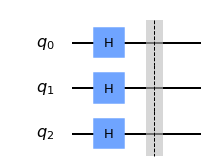

In [54]:
# Set the state we wish to search 
N = '110'
num_qubits = len(N)

# Create the quantum circuit 
qc = QuantumCircuit(num_qubits)

# Set all qubits in superposition
qc.h(range(num_qubits))
qc.barrier()

#Draw the circuit
qc.draw()


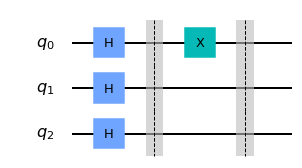

In [55]:
# Reverse the state so it’s in proper qubit ordering
N = N[::-1]

# Encode N into our circuit
for idx in range(num_qubits):
    if N[idx] == '0':
        qc.x(idx)
qc.barrier()

# Draw the circuit
qc.draw()


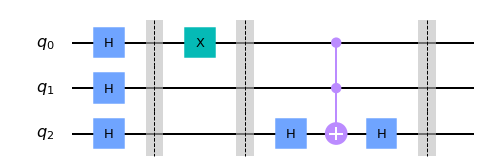

In [56]:
# Create the Grover oracle for our 3-qubit quantum circuit
qc.h(2)
qc.ccx(0, 1, 2)
qc.h(2)
qc.barrier()

# Draw the circuit
qc.draw()


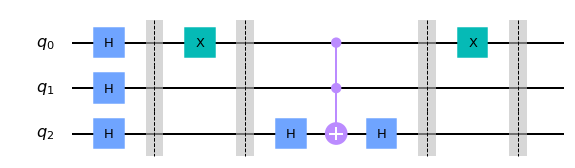

In [57]:
# Reset the value after the oracle
for idx in range(num_qubits):
    if N[idx] == '0':
        qc.x(idx)
qc.barrier()

# Draw the circuit
qc.draw()


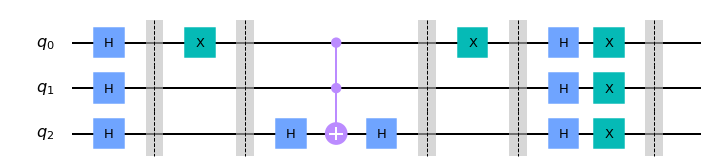

In [58]:
# Set all qubits in superposition
qc.h(range(num_qubits))
qc.x(range(num_qubits))
qc.barrier()

# Draw the circuit
qc.draw()


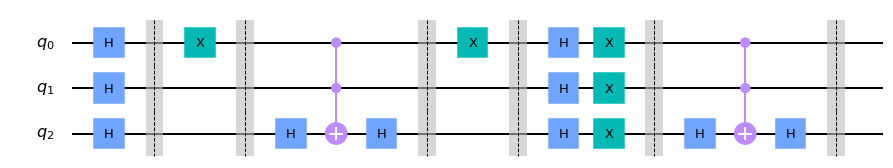

In [59]:
# Apply another oracle, same as the previous, 
qc.h(2)
qc.ccx(0, 1, 2)
qc.h(2)
qc.barrier()

# Draw the circuit
qc.draw()


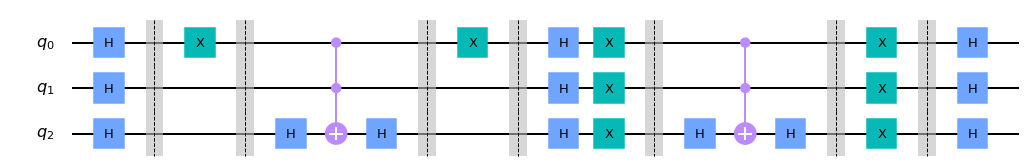

In [60]:
# Reapply the X rotations on all qubits
qc.x(range(num_qubits))

qc.barrier()

# Reapply Hadamard gates to all qubits
qc.h(range(num_qubits))

# Draw the circuit
qc.draw()


In [61]:
# Add measurement operators
qc.measure_all()

# Draw the circuit
qc.draw()

# Run on the qasm simulator
backend = Aer.get_backend('qasm_simulator')
# Execute the circuit on the backend
job = execute(qc, backend, shots=1024)

# Extract the results
results = job.result()
counts = results.get_counts(qc)


{'000': 45, '001': 27, '010': 32, '011': 39, '100': 25, '101': 36, '110': 785, '111': 35}


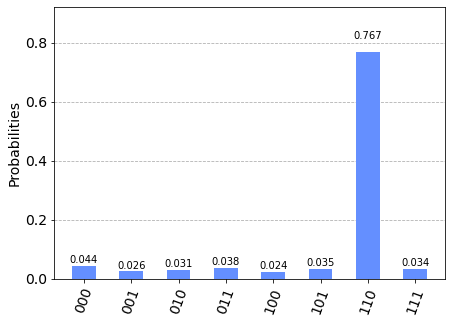

In [62]:
# Run on the qasm simulator
backend = Aer.get_backend('qasm_simulator')

# Execute the circuit on the backend
job = execute(qc, backend, shots=1024)

# Extract the results
results = job.result()
counts = results.get_counts(qc)

# Print and plot results
print(counts)
plot_histogram(counts)


### Run Grover's algorithm on a quantum computer

In [63]:
# Execute the circuit on the least busy quantum computer
from qiskit.providers.ibmq import least_busy

backend = least_busy(provider.backends(filters=lambda x: x.configuration().n_qubits >= (num_qubits) and
                                   not x.configuration().simulator and x.status().operational==True))
print("Set backend: ", backend)

# Launch the job watcher widget
%qiskit_job_watcher


Set backend:  ibmq_vigo


Accordion(children=(VBox(layout=Layout(max_width='710px', min_width='710px')),), layout=Layout(max_height='500…

<IPython.core.display.Javascript object>

{'000': 36, '001': 80, '010': 112, '011': 80, '100': 104, '101': 66, '110': 458, '111': 88}


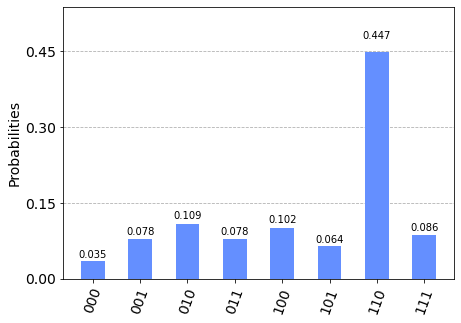

In [64]:
# Execute the circuit on the backend
job = execute(qc, backend, shots=1024)

# Extract the results
results = job.result()
counts = results.get_counts(qc)

# Print and plot results
print(counts)
plot_histogram(counts)


In [1]:
import qiskit.tools.jupyter
%qiskit_version_table